In [2]:
import sys
sys.executable
import sklearn
# %pip install scikit-learn

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv('../data/DailyReturn.csv', sep=',')
# data = np.loadtxt(open('../data/DailyReturn.csv', "r"), delimiter=",", skiprows=1, skipcols=1)

data.head(3)

,Unnamed: 0,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,2021/10/21,0.002608,0.001474,0.010897,0.005842,0.032571,0.000825,0.002566,0.003228,0.026648,...,-0.000329,-0.002156,-0.004130,0.010683,0.001944,0.005416,0.009789,0.012832,-0.004696,0.012841
1,2021/10/22,-0.001036,-0.005285,-0.005149,-0.028955,0.017539,-0.030443,-0.029104,-0.050515,0.001498,...,0.015748,0.005984,-0.000207,-0.002181,0.003732,0.003913,-0.002568,-0.010957,0.013526,-0.008040
2,2021/10/25,0.005363,-0.000336,-0.003332,-0.004551,0.126616,-0.000869,0.001068,0.012569,0.019361,...,0.002221,-0.002974,-0.005599,0.011770,0.006395,0.004618,-0.009720,-0.000173,0.002017,0.017145


In [4]:
new_data = data.drop(columns=['Unnamed: 0', 'SPY'])

In [5]:
new_data.tail(3)

,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,BRK-B,JPM,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
57,0.002570,0.010445,-0.000937,0.039290,0.012126,0.011645,-0.003320,0.006543,0.001845,0.005672,...,0.004870,0.001635,0.000202,0.000691,-0.001658,-0.007799,-0.000522,-0.006996,0.010204,-0.010780
58,-0.019028,-0.042323,-0.024170,-0.067491,-0.020105,-0.017769,-0.020344,-0.050859,0.002715,-0.001247,...,0.006758,0.004008,0.016569,-0.022849,-0.005121,0.010739,-0.000522,0.012125,0.006633,-0.010898
59,0.005111,0.017717,0.005732,0.017498,0.006447,0.004711,0.016601,0.013810,0.008934,-0.061463,...,-0.013321,0.006801,0.009938,0.013076,-0.001530,0.020374,-0.004405,-0.010847,0.009585,-0.019694


In [7]:
# implement exponentially weighted covariance matrix
alpha = 0.97
weights = (1-alpha)**np.arange(len(new_data))[::-1]
norm_new_data = (new_data - new_data.mean()).fillna(0).to_numpy()
exp_weight_cov = ((weights * norm_new_data.T)@norm_new_data)/(weights.sum())


In [ ]:
# wrapper to a function
def exp_weig_cov(new_data, alpha=0.97):# alpha is lambda
    weights = (1-alpha)**np.arange(len(new_data))[::-1]
    norm_new_data = (new_data - new_data.mean()).fillna(0).to_numpy()
    exp_weight_cov = ((weights * norm_new_data.T)@norm_new_data)/(weights.sum())

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA()


In [9]:
new_data_scale = scaler.fit_transform(new_data)

In [16]:
print(new_data['AAPL'].mean())
print(new_data_scale[:,0].mean())
print(new_data_scale[:,0].std())

0.002620594766666666
3.9782991715734776e-17
1.0


In [20]:
# PCA
new_data_pca = pca.fit(new_data_scale)
print(new_data_pca.explained_variance_ratio_)

[2.58227510e-01 1.36145431e-01 7.88188611e-02 4.29073541e-02
 3.76928365e-02 3.39736427e-02 2.58574942e-02 2.38370408e-02
 2.28638006e-02 2.24009418e-02 2.00049511e-02 1.89005669e-02
 1.82336322e-02 1.73383849e-02 1.63141365e-02 1.52344845e-02
 1.46840157e-02 1.30565697e-02 1.27724412e-02 1.16654365e-02
 1.09938118e-02 1.02500233e-02 9.64246911e-03 9.05542381e-03
 8.65717612e-03 8.36891418e-03 7.62568477e-03 7.39761938e-03
 7.10437078e-03 6.28114954e-03 6.00078956e-03 5.78128591e-03
 5.22487372e-03 4.65294867e-03 4.63480540e-03 4.39954965e-03
 3.97889644e-03 3.95208378e-03 3.46913103e-03 3.29266967e-03
 3.02020648e-03 2.83177142e-03 2.76025107e-03 2.67585331e-03
 2.24707336e-03 1.99418844e-03 1.82952502e-03 1.66297061e-03
 1.61086808e-03 1.25362344e-03 1.13573956e-03 1.08559710e-03
 8.90622840e-04 7.98103229e-04 7.29865031e-04 6.33139125e-04
 4.81267481e-04 4.28890537e-04 2.37235287e-04 5.09263969e-32]


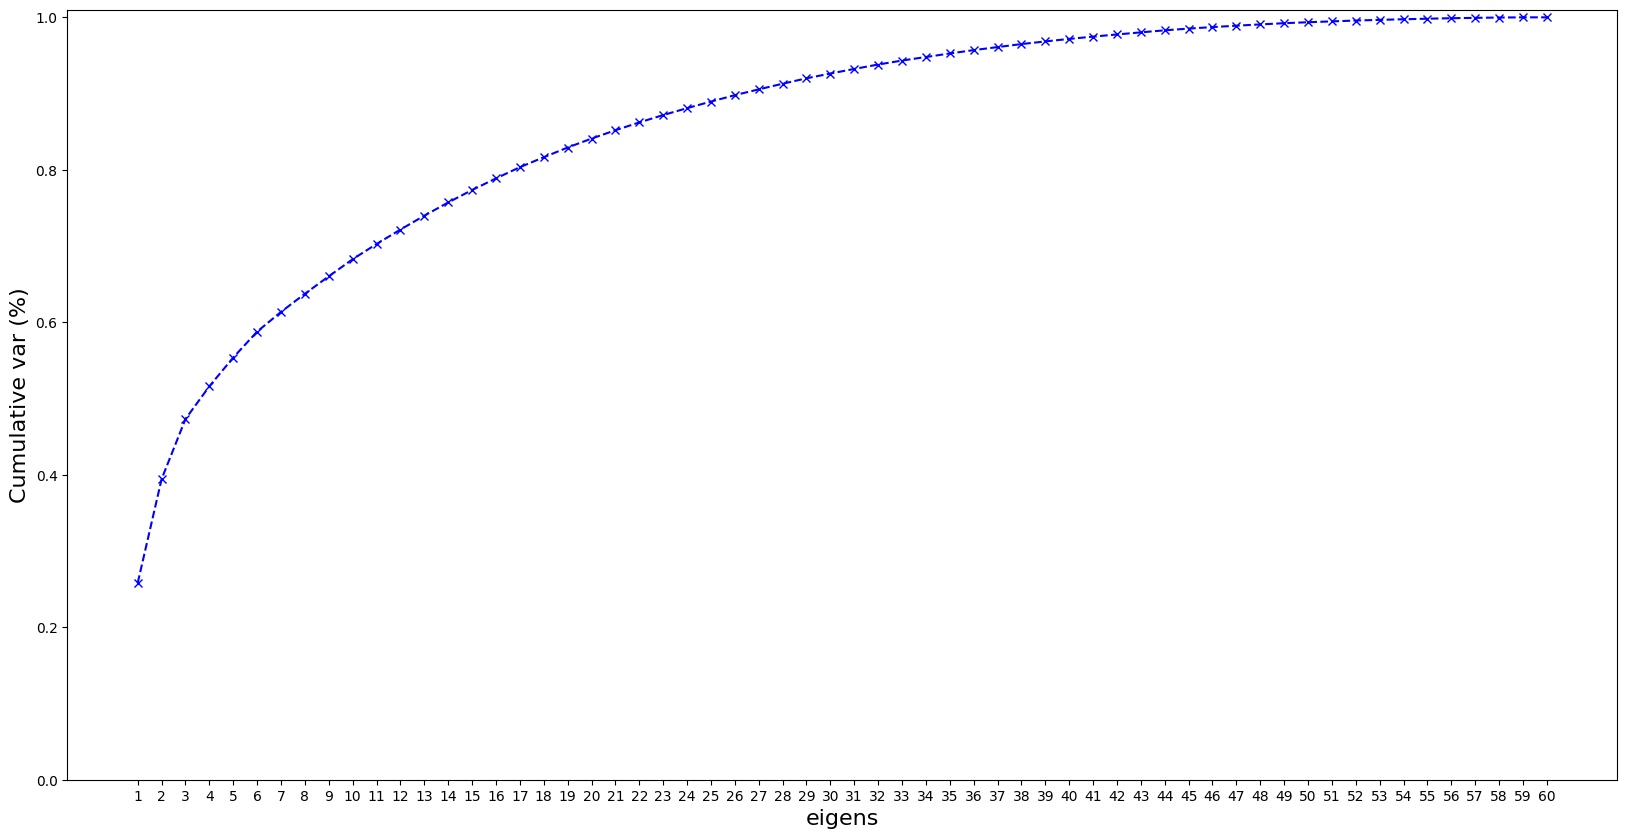

In [36]:
# plot cumulative variance
import matplotlib.pyplot as plt

# matplotlib setting
plt.figure(figsize = (20,10))
plt.ylim(0,1.01)
plt.xlabel("eigens", fontsize=16)
plt.xticks(np.arange(1, 60+1, step=1))
plt.ylabel('Cumulative var (%)', fontsize=16)

# data
dimensions = np.arange(1, 60+1, 1)
variance = np.cumsum(new_data_pca.explained_variance_ratio_)

plt.plot(dimensions, variance, marker='x', linestyle='--', color='blue')

# plt.show()

plt.savefig("acc_var.jpg",dpi=60)


In [77]:
covs = new_data.ewm(alpha=0.94).cov().iloc[-len(new_data.columns):]
covs = covs.reset_index(level = 0, drop = True)

In [78]:
covs

,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,BRK-B,JPM,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
AAPL,0.000274,0.000681,0.000340,0.000963,0.000301,0.000255,0.000420,0.000734,0.000071,-0.000684,...,-0.000228,0.000032,-0.000076,0.000408,0.000041,0.000110,-0.000044,-0.000260,0.000033,-0.000099
MSFT,0.000681,0.001695,0.000844,0.002395,0.000748,0.000633,0.001045,0.001825,0.000176,-0.001708,...,-0.000569,0.000079,-0.000185,0.001015,0.000101,0.000275,-0.000110,-0.000649,0.000083,-0.000250
AMZN,0.000340,0.000844,0.000422,0.001190,0.000372,0.000315,0.000522,0.000910,0.000088,-0.000854,...,-0.000284,0.000040,-0.000093,0.000507,0.000051,0.000139,-0.000054,-0.000323,0.000041,-0.000123
TSLA,0.000963,0.002395,0.001190,0.003416,0.001066,0.000904,0.001462,0.002580,0.000243,-0.002355,...,-0.000789,0.000108,-0.000272,0.001427,0.000143,0.000363,-0.000152,-0.000916,0.000119,-0.000345
GOOGL,0.000301,0.000748,0.000372,0.001066,0.000333,0.000282,0.000457,0.000806,0.000076,-0.000738,...,-0.000247,0.000034,-0.000085,0.000446,0.000045,0.000114,-0.000048,-0.000286,0.000037,-0.000108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LMT,0.000110,0.000275,0.000139,0.000363,0.000114,0.000095,0.000182,0.000296,0.000034,-0.000327,...,-0.000106,0.000017,-0.000021,0.000171,0.000016,0.000067,-0.000021,-0.000107,0.000013,-0.000048
SYK,-0.000044,-0.000110,-0.000054,-0.000152,-0.000048,-0.000040,-0.000069,-0.000118,-0.000012,0.000119,...,0.000039,-0.000006,0.000010,-0.000066,-0.000006,-0.000021,0.000008,0.000043,-0.000005,0.000019
GM,-0.000260,-0.000649,-0.000323,-0.000916,-0.000286,-0.000242,-0.000400,-0.000698,-0.000068,0.000657,...,0.000219,-0.000031,0.000070,-0.000388,-0.000039,-0.000107,0.000043,0.000249,-0.000032,0.000097
TFC,0.000033,0.000083,0.000041,0.000119,0.000037,0.000031,0.000051,0.000090,0.000009,-0.000082,...,-0.000028,0.000004,-0.000009,0.000050,0.000005,0.000013,-0.000005,-0.000032,0.000004,-0.000012


In [79]:
exp_weight_cov

array([[ 5.38365364e-07,  1.54673884e-06,  7.30335246e-07, ...,
        -6.94263930e-07,  2.17304424e-07, -5.82909985e-07],
       [ 1.54673884e-06,  6.46268923e-06,  2.70278391e-06, ...,
        -3.75651253e-06,  2.08168175e-06, -5.40946015e-06],
       [ 7.30335246e-07,  2.70278391e-06,  1.17335548e-06, ...,
        -1.47008457e-06,  7.32430969e-07, -1.91218911e-06],
       ...,
       [-6.94263930e-07, -3.75651253e-06, -1.47008457e-06, ...,
         2.43335586e-06, -1.55296978e-06,  4.01253468e-06],
       [ 2.17304424e-07,  2.08168175e-06,  7.32430969e-07, ...,
        -1.55296978e-06,  1.14231729e-06, -2.93386193e-06],
       [-5.82909985e-07, -5.40946015e-06, -1.91218911e-06, ...,
         4.01253468e-06, -2.93386193e-06,  7.54642728e-06]])

In [74]:
# calculate exponentially weighted covariance matrix
def ewma(df, alpha=0.94):
    weights = (1-alpha) ** np.arange(len(df))[::-1]

    # fillna with 0 here
    normalized = (df-df.mean()).fillna(0).to_numpy()
    
    out =  ((weights * normalized.T) @ normalized / weights.sum()
    
    return out

 # verify
 out = ewma(df)
 print(out[0,1] == ewma_cov_pairwise(df[0],df[1]) )

SyntaxError: invalid syntax (296728679.py, line 10)